In [27]:
#Import all necessary libraries.
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from PIL import Image
import six
from io import StringIO
import imageio

In [28]:

# Image Plot

image_name="img2.jpg"
display.HTML('<img src="{}" height=400px style="height: 400px;">'.format("https://drive.google.com/file/d/1tXfGvo4gBNm2cxtpw3iJmRUwoW9T-8OI/view")) #To display the image

In [29]:
image = imageio.imread(image_name)

In [33]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Width:",w)
print("Height:",h)
print("Dimensions/Pixels:",d)
print("Each pixel has valus in the range [0 - 255]")
print("Image has {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("File size: {} Mb".format((w*h*d)/(10000000)))

Width: 400
Height: 500
Dimensions/Pixels: 3
Each pixel has valus in the range [0 - 255]
Image has 400 x 500 x 3 = 600000 bytes
File size: 0.06 Mb


In [34]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that
# plt.imshow behaves works well on float data (need to be in the range [0-1])
image = np.array(image, dtype=np.float64) / 255
# # Load Image and transform to a 2D numpy array.
# w, h, d = original_shape = tuple(image.shape)
# print(w,h,d)

assert d == 3 #The code forward runs for 3 channel only 

In [35]:
image_array = np.reshape(image, (w * h, d))
print(image_array)
print(image_array.shape)

[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
(200000, 3)


In [36]:
%%javascript
//To make the output area non-scrollable
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# K-Means ( K=2 )

In [37]:
n_colors = 2 #Value of k

In [38]:
print("Fitting model on a small sub-sample of the data")

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k(2) clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

Fitting model on a small sub-sample of the data


In [39]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
Predicted Labels: [0 0 0 ... 0 0 0]


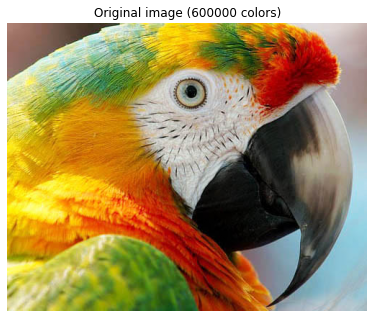

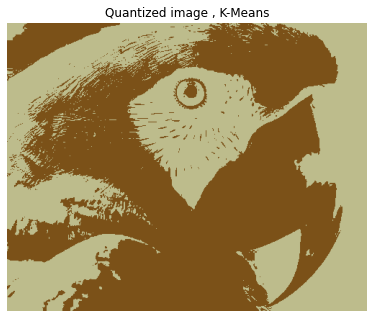

In [40]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image , K-Means')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [42]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Width:",w)
print("Height:",h)
print("Bits/color:",n_colors)
print("Approximate Size(K=2): ({} x {} x {})/8 = {} Kbytes".format(w,h,n_colors,((w*h*n_colors)/8)/1000))


Width: 400
Height: 500
Bits/color: 2
Approximate Size(K=2): (400 x 500 x 2)/8 = 50.0 Kbytes


# K-Means (K=4) 

In [43]:
n_colors = 4 #Value of k

In [44]:
print("Fitting model on a small sub-sample of the data")

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k(2) clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

Fitting model on a small sub-sample of the data


In [45]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
Predicted Labels: [2 2 2 ... 2 2 2]


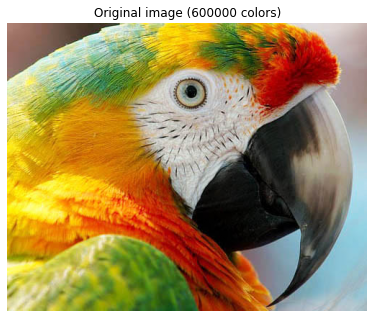

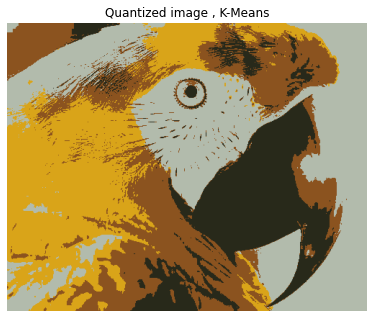

In [46]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image , K-Means')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [48]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Width:",w)
print("Height:",h)
print("Bits/color:",n_colors)
print("Approximate Size(K=4): ({} x {} x {})/8 = {} Kbytes".format(w,h,n_colors,((w*h*n_colors)/8)/1000))

Width: 400
Height: 500
Bits/color: 4
Approximate Size(K=4): (400 x 500 x 4)/8 = 100.0 Kbytes


# K-Means ( K=8 )

In [49]:
n_colors = 8 #Value of k

In [50]:
print("Fitting model on a small sub-sample of the data")

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k(2) clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

Fitting model on a small sub-sample of the data


In [51]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
Predicted Labels: [5 5 5 ... 1 1 1]


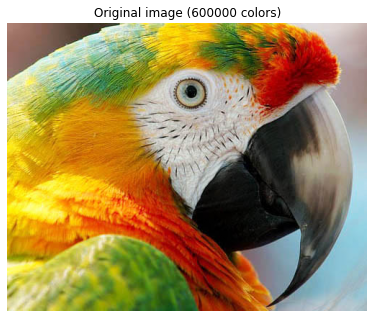

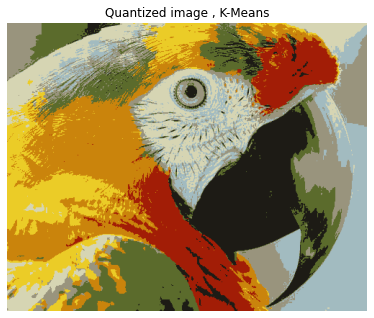

In [52]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image , K-Means')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [53]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Width:",w)
print("Height:",h)
print("Bits/color:",n_colors)
print("Approximate Size(K=8): ({} x {} x {})/8 = {} Kbytes".format(w,h,n_colors,((w*h*n_colors)/8)/1000))

Width: 400
Height: 500
Bits/color: 8
Approximate Size(K=8): (400 x 500 x 8)/8 = 200.0 Kbytes


# K-Means ( K=16 )

In [54]:
n_colors = 16 #Value of k

In [55]:
print("Fitting model on a small sub-sample of the data")

#Take only 2000 random points to train our k-means 
image_array_sample = shuffle(image_array, random_state=0)[:2000]

#Using k-means to create k(2) clusters
#Cluster of close RGB colour are grouped together and labeled using their centroid(geometric mean)
kmeans = KMeans(n_clusters=n_colors, random_state=0)
knnsample = kmeans.fit(image_array_sample)

Fitting model on a small sub-sample of the data


In [56]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print("Predicted Labels:",labels)

Predicting color indices on the full image (k-means)
Predicted Labels: [ 1  1  1 ... 10 10 10]


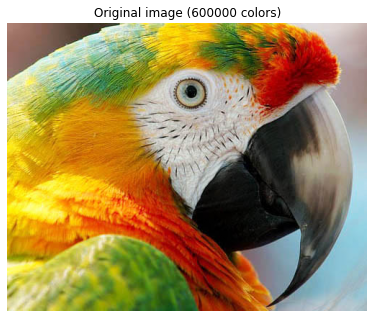

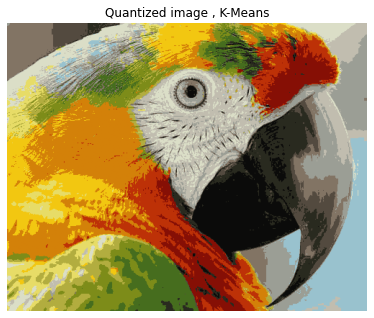

In [57]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image , K-Means')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [58]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Width:",w)
print("Height:",h)
print("Bits/color:",n_colors)
print("Approximate Size(K=16): ({} x {} x {})/8 = {} Kbytes".format(w,h,n_colors,((w*h*n_colors)/8)/1000))

Width: 400
Height: 500
Bits/color: 16
Approximate Size(K=16): (400 x 500 x 16)/8 = 400.0 Kbytes
